In [7]:
#Lasso Method
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn import datasets


In [8]:
#Import Data and Extract Features and Dependend Variable
train = pd.read_csv("./data/cleaned_standardized_fe.csv")
features = train.drop('SalePrice', axis = 1)
price = train['SalePrice'] 

In [12]:
#Cross Validate Lasso Model to Select Best alpha
alphas = np.linspace(.000001, 1, 100)
lasso_cv = LassoCV(alphas = alphas, cv = 10, max_iter = 10000, normalize = False)
lasso_cv.fit(features,price)
print('the best alpha is: %.5f' %(lasso_cv.alpha_))

#Fit Model on complete test set using best alpha and get R^2 score and print coeficients
lasso = Lasso()
lasso.set_params(normalize=False)
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(features, price)
print('the R^2 Score is: %.2f' %(lasso.score(features, price)))
#pd.Series(ridge.coef_, index=features.columns)

the best alpha is: 0.01010
the R^2 Score is: 0.91


In [14]:
test = pd.read_csv("./data/cleaned_standardized_TEST.csv")
train_pre_stand = pd.read_csv("./data/train.csv")
submission = pd.read_csv("./data/sample_submission.csv")
sale_price_pred = lasso.predict(test)
submission['SalePrice'] = sale_price_pred
submission.head()

,Id,SalePrice
0,1461,0.788115
1,1462,0.088210
2,1463,-0.328042
3,1464,-0.611427
4,1465,-0.603971


In [15]:
#inverse transform
from sklearn.preprocessing import StandardScaler
#Re-Train Scaler
scaler = StandardScaler()
scaler = scaler.fit(train_pre_stand[['SalePrice']]**-.1)


# inverse transform on transformed price
submission['SalePrice'] = (scaler.inverse_transform(submission['SalePrice'])**-10).round(0)
submission.to_csv("./data/lasso_submission.csv",index = False)

In [16]:
submission['SalePrice'].head()

0    121387.0
1    159689.0
2    188665.0
3    211686.0
4    211043.0
Name: SalePrice, dtype: float64

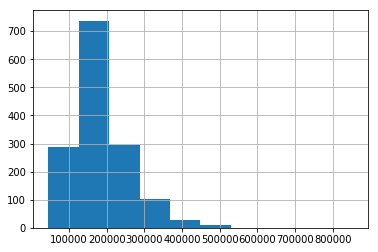

In [17]:
submission['SalePrice'].hist()

In [18]:
lasso.coef_

array([-0.09415314,  0.        , -0.        , -0.03668841, -0.00718341,
       -0.02973549, -0.0824261 , -0.03457695, -0.        , -0.02425695,
       -0.04319675, -0.09252705, -0.07121654,  0.        ,  0.        ,
       -0.01460175,  0.        ,  0.00420532, -0.00954351,  0.        ,
       -0.04680016, -0.        ,  0.        ,  0.        ,  0.00160349,
        0.        , -0.        ,  0.        , -0.        , -0.00317591,
       -0.2009768 ,  0.12891821,  0.03264426, -0.00608542, -0.        ,
        0.        ,  0.        ,  0.01058486, -0.        ,  0.00954522,
       -0.        ,  0.01276159, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.0027379 , -0.03930566, -0.01008198, -0.00107877, -0.03445464,
        0.        , -0.2877759 , -0.        , -0.06046459,  0.        ,
        0.00378707,  0.00303889,  0.        ,  0.00088036,  0.  

In [22]:
#Find columns of insignificance
coef_mask = coef = [True if abs(x) > .01 else False for x in lasso.coef_]